# Objective

To build a basic classification model that predicts whether a customer will purchase a
product or service based on their demographic and behavioral data.

# Data Loading & Understanding

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df=pd.read_csv("customer_purchase_data.csv")

## Basic Understanding of Dataset

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [11]:
df.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [4]:
df.shape

(1500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


## Target Variable

"PurchaseStatus" is the target variable

# Data Preprocessing

## Handle missing values

In [6]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [8]:
# No missing values

## Encode categorical variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [12]:
# No categorical variables

## Input-Output Features

In [14]:
X= df.drop(axis=1,columns=['PurchaseStatus'])
y=df['PurchaseStatus']

In [15]:
X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


In [16]:
X.shape

(1500, 8)

In [17]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: PurchaseStatus, dtype: int64

In [18]:
y.shape

(1500,)

## Scale numerical features

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_scaled=scaler.fit_transform(X)

In [23]:
X_scaled

array([[-0.27676055,  0.99070982, -0.48193427, ...,  0.00586386,
        -0.69652603,  1.43417244],
       [-1.56441822,  0.99070982, -1.61282066, ...,  0.45769362,
        -0.69652603,  1.43417244],
       [-1.11373803,  0.99070982,  1.15831147, ...,  0.06856645,
         1.43569652, -1.49909543],
       ...,
       [-0.27676055,  0.99070982, -0.71472882, ..., -1.07564035,
        -0.69652603, -1.49909543],
       [ 1.20404576, -1.0093773 ,  1.32314327, ...,  0.40300974,
         1.43569652, -1.49909543],
       [ 0.36706828, -1.0093773 , -0.84067156, ..., -0.30161405,
         1.43569652,  0.84751886]])

## Train-Test Sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape,y_train.shape

((1200, 8), (1200,))

In [27]:
X_test.shape,y_test.shape

((300, 8), (300,))

# Exploratory Data Analysis (EDA)

In [28]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


## Plot distributions

<Axes: xlabel='Gender', ylabel='count'>

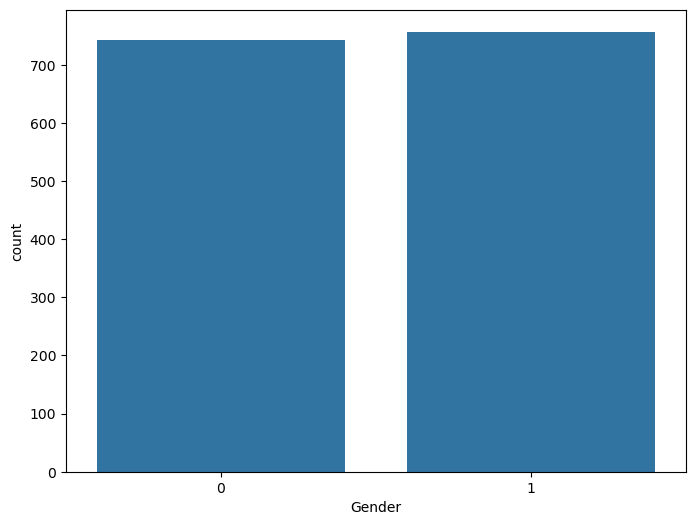

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Gender'])

<Axes: xlabel='LoyaltyProgram', ylabel='count'>

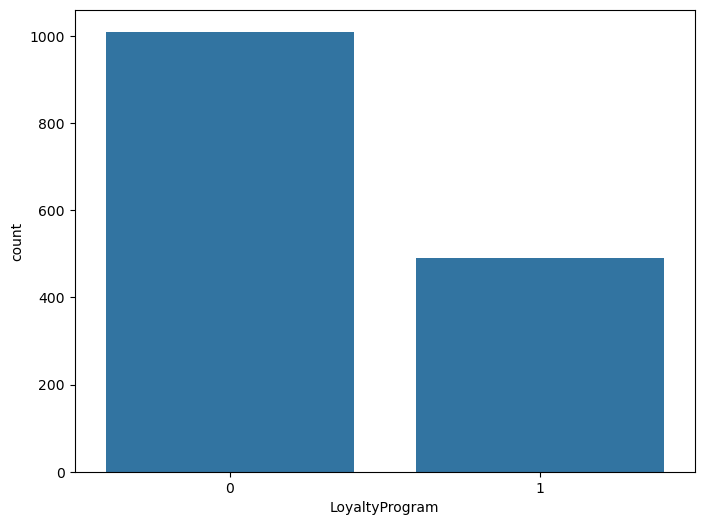

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['LoyaltyProgram'])

<Axes: xlabel='ProductCategory', ylabel='count'>

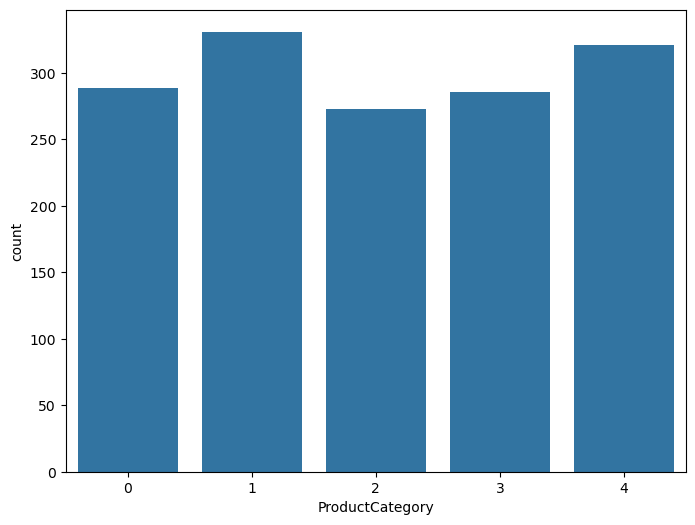

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['ProductCategory'])

<Axes: xlabel='DiscountsAvailed', ylabel='count'>

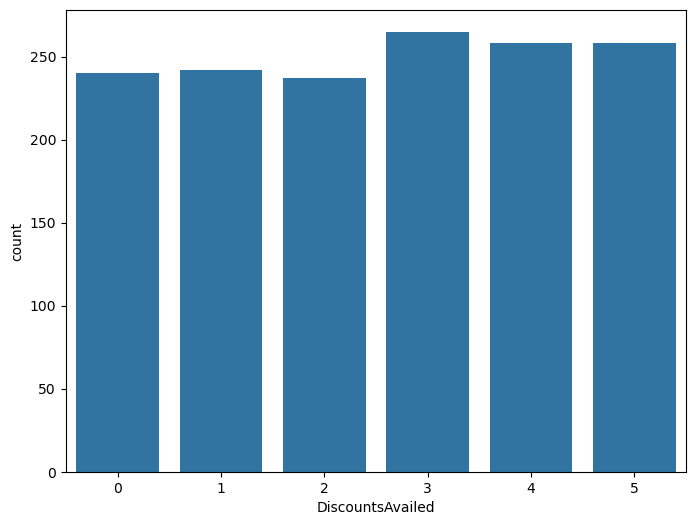

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['DiscountsAvailed'])

<Axes: xlabel='TimeSpentOnWebsite', ylabel='Count'>

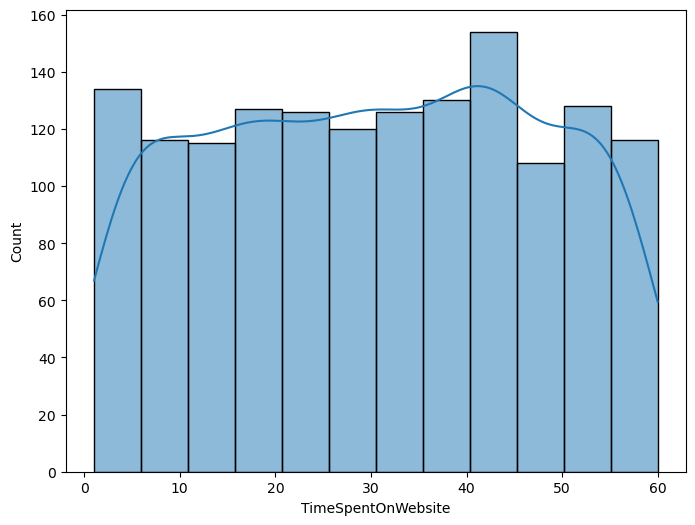

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['TimeSpentOnWebsite'],kde=True)

## Heatmap

In [42]:
df.corr()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.022055,0.016438,-0.038778,-0.020767,0.032309,-0.005980,0.004009,-0.255747
Gender,0.022055,1.000000,0.010054,0.001373,-0.028572,0.012814,0.033302,-0.056624,0.002627
AnnualIncome,0.016438,0.010054,1.000000,0.000276,0.032163,-0.001505,-0.045296,0.016393,0.188214
NumberOfPurchases,-0.038778,0.001373,0.000276,1.000000,0.006270,0.024644,0.055358,0.029581,0.222691
ProductCategory,-0.020767,-0.028572,0.032163,0.006270,1.000000,-0.011013,0.026680,0.034369,0.007346
TimeSpentOnWebsite,0.032309,0.012814,-0.001505,0.024644,-0.011013,1.000000,0.005965,0.001240,0.277112
LoyaltyProgram,-0.005980,0.033302,-0.045296,0.055358,0.026680,0.005965,1.000000,-0.048462,0.310838
DiscountsAvailed,0.004009,-0.056624,0.016393,0.029581,0.034369,0.001240,-0.048462,1.000000,0.303297
PurchaseStatus,-0.255747,0.002627,0.188214,0.222691,0.007346,0.277112,0.310838,0.303297,1.000000


<Axes: >

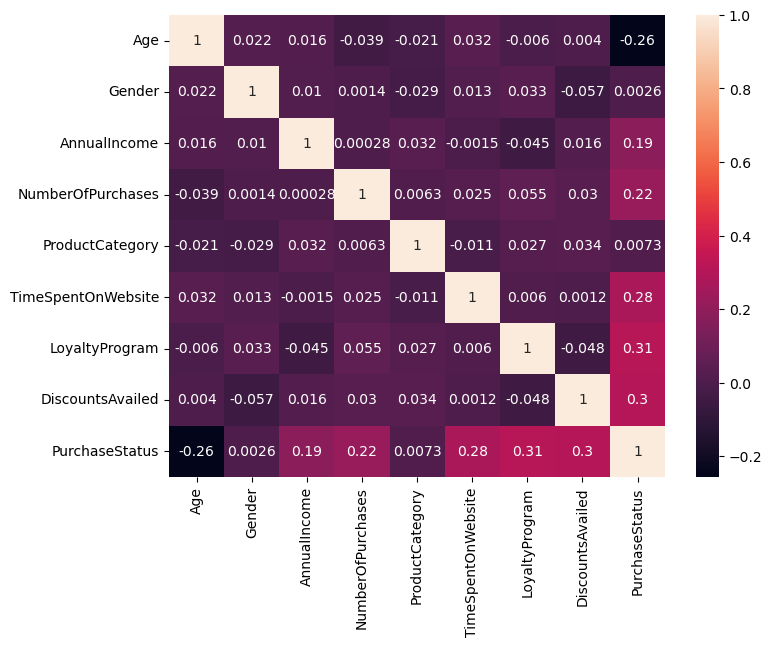

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

## Insights

1. **Gender Distribution**
   - Male customers (Gender = 1) slightly outnumber female customers (Gender = 0).
   - However, the difference is marginal, suggesting that gender alone may not be a strong predictor of purchase behavior.

2. **Loyalty Program Participation**
   - A significant majority of customers are **not enrolled** in the loyalty program.
   - This indicates a potential opportunity for increasing customer retention and repeat purchases through targeted loyalty incentives.

3. **Product Category Preference**
   - Product Category **1** recorded the highest number of purchases.
   - This was followed by categories **4, 0, 3, and 2**, in decreasing order.
   - The uneven distribution suggests that certain product categories are more aligned with customer demand and purchasing intent.

4. **Discount Usage**
   - The maximum number of discounts availed by customers was **3**.
   - Most customers used fewer discounts, indicating that excessive discounting may not be necessary to drive purchases.

5. **Time Spent on Website**
   - Most customers spent approximately **40–45 minutes** browsing the website.
   - This suggests a strong engagement window, which can be leveraged for targeted recommendations and promotional messaging.

6. **Age vs Purchase Behavior**
   - Age shows a **negative correlation** with PurchaseStatus.
   - Younger customers demonstrate a higher likelihood of making purchases compared to older customers.
   - This insight highlights age as a potentially important feature in predicting purchasing behavior.

# Model Building and Evaluation

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [49]:
models={
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

In [61]:
evaluation = []

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} training complete...")

    pred = model.predict(X_test)

    evaluation.append({
        "Name": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "F1": f1_score(y_test, pred),
        "Confusion Matrix": confusion_matrix(y_test, pred)
    })

evaluation_data = evaluation_data.sort_values(by="Accuracy", ascending=False)
evaluation_data

Logistic Regression training complete...
Random Forest training complete...


,Name,Accuracy,Precision,Recall,F1,Confusion Matrix
1,Random Forest,0.953333,0.97500,0.914062,0.943548,"[[169, 3], [11, 117]]"
0,Logistic Regression,0.836667,0.87619,0.718750,0.789700,"[[159, 13], [36, 92]]"


## Final Model Comparison Summary

Multiple classification models were trained and evaluated using Accuracy, Precision, Recall, and F1-score.

Based on the evaluation metrics:
- The best performing model was **Random Forest**
- It achieved the highest balance between Precision and Recall, with high accuracy
- This makes it suitable for predicting customer purchases

Other model performed reasonably but suffered from lower recall.